## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
import shap
from lightgbm import LGBMRegressor

In [18]:
pd.set_option('display.max_columns',None)

In [230]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [231]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

In [232]:
df_temperatura_07=pd.read_csv('data/temp_2007.csv')
df_temperatura_08=pd.read_csv('data/temp_2008.csv')
df_temperatura_09=pd.read_csv('data/temp_2009.csv')
df_temperatura_10=pd.read_csv('data/temp_2010.csv')
df_temperatura_11=pd.read_csv('data/temp_2011.csv')
df_temperatura_12=pd.read_csv('data/temp_2012.csv')
df_temperatura_13=pd.read_csv('data/temp_2013.csv')
df_temperatura_14=pd.read_csv('data/temp_2014.csv')
df_temperatura_15=pd.read_csv('data/temp_2015.csv')
df_temperatura=pd.concat([df_temperatura_07, df_temperatura_08,df_temperatura_09,df_temperatura_10,df_temperatura_11,df_temperatura_12,df_temperatura_13,df_temperatura_14,df_temperatura_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [233]:
df.head()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
0,2013,-398345888794880068,13,28,4,4,-1687781257578748014,-320943158-171303395,10041944,1,28,1,30102013,1,13112013,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,NML,69,1,4441.45
1,2013,-3959599681650518086,13,28,3,4,166370745435838543,648485069584850511,10061937,1,28,1,19032013,1,25032013,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,NML,75,0,4550.50
2,2013,-3959599681650518086,13,28,3,4,183632305468848809,899288196-1988273609,14111923,1,28,1,15112013,1,26112013,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,NML,90,0,4441.45
3,2013,-1468647043-245326524,13,28,4,5,2877111881585847151,-961279109-1723117644,10051956,2,28,1,28042013,1,14052013,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,NML,56,0,4441.45
4,2013,946141513-1168024764,13,28,3,3,17519509571482774643,-33451060035352825,7091928,1,28,1,7022013,2,8022013,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,NML,84,0,4761.87


In [234]:
df.tail()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
140932,2014,-397825696459335749,13,28,3,4,15732651961347031435,-148801774-1928770906,7111939,2,28,1,23112013,1,7012014,1,45,491.21,E878.1,519.8,518.84,511.9,786.30,276.1,276.7,415.12,038.9,996.61,250.00,401.9,V45.82,17122013.0,37.87,33.22,99.21,87.41,88.43,88.72,90.52,90.42,87.41,89.65,91.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,0,Q,2.1374,951,0,Q,5.3027,4,4,NML,74,1,9760.5
140933,2014,-3959599681650518086,13,28,3,4,1259742565-1684660259,-12521883511529773304,9011954,2,28,1,10122013,1,10022014,4,62,486,NaN,518.81,518.0,511.9,733.13,516.36,276.2,733.00,519.8,V10.11,V15.82,437.0,V46.2,6022014.0,77.49,81.65,33.24,90.42,91.32,88.93,90.52,87.44,33.26,88.01,87.41,89.52,88.72,31.42,18.11,99.23,87.24,93.9,93.18,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,3,NML,59,1,10274.5
140934,2014,6786010821767932736,13,28,2,3,82420401566747514,4927991441436875167,7101953,1,28,1,31102014,1,18112014,1,18,486,NaN,510.9,511.89,494.1,491.21,511.9,518.81,799.02,272.4,790.6,275.49,712.30,122.8,7112014.0,34.06,34.04,34.91,87.44,89.52,87.44,89.52,88.74,88.73,99.23,99.21,93.96,93.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,4,NML,61,0,10274.5
140935,2014,-398345888794880068,13,28,4,4,-1318909344-1737054105,2075399370-1949447169,19041951,1,28,1,3032014,1,15032014,4,12,481,NaN,518.81,995.91,491.21,511.9,276.2,584.9,518.89,573.8,285.9,305.1,303.91,V12.54,NaN,34.04,34.20,88.43,87.41,90.59,87.44,89.52,93.96,89.66,99.04,89.65,88.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,3,NML,62,0,10274.5
140936,2014,6785908421717601093,13,28,4,5,-758230369-639741394,-18336156992074847197,5111946,1,28,1,29012014,1,14022014,1,16,511.81,NaN,518.81,428.0,162.5,196.1,197.2,255.10,584.9,405.99,278.00,496,427.31,276.8,10022014.0,34.92,99.25,34.20,34.91,99.23,93.94,93.96,89.65,88.72,91.39,90.59,89.52,87.44,99.19,99.29,90.49,NaN,NaN,NaN,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,4,NML,67,1,10274.5


In [235]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [236]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [237]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
año,140937.0,NaN,NaN,NaN,2011.504729,2.248531,2008.0,2010.0,2012.0,2013.0,2015.0
hospital_recodificado,140937,34,-398345888794880068,16385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comunidad_autónoma,140937.0,NaN,NaN,NaN,13.0,0.0,13.0,13.0,13.0,13.0,13.0
provincia,140937.0,NaN,NaN,NaN,28.0,0.0,28.0,28.0,28.0,28.0,28.0
grupo_hospital,140937.0,NaN,NaN,NaN,3.069386,0.963666,1.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
nivel_mortalidad,140937.0,NaN,NaN,NaN,2.166997,0.967887,0.0,1.0,2.0,3.0,4.0
servicio,140937,2,NML,139565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,140937.0,NaN,NaN,NaN,66.232373,17.506537,0.0,57.0,70.0,79.0,110.0
reingreso,140937.0,NaN,NaN,NaN,0.129136,0.335351,0.0,0.0,0.0,0.0,1.0


In [238]:
comunidad_autonoma=13
provincia=28

In [239]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [240]:
df_calidad_aire.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2007,1,12.0,V,17.0,V,27.0,V,25.0,V,23.0,V,20.0,V,15.0,V,11.0,V,15.0,V,15.0,V,26.0,V,31.0,V,29.0,V,23.0,V,20.0,V,16.0,V,11.0,V,12.0,V,20.0,V,22.0,V,20.0,V,12.0,V,15.0,V,18.0,V,15.0,V,15.0,V,15.0,V,21.0,V,19.0,V,14.0,V,21.0,V
1,28,79,4,1,28079004_1_38,2007,2,20.0,V,20.0,V,18.0,V,19.0,V,17.0,V,17.0,V,14.0,V,13.0,V,13.0,V,12.0,V,11.0,V,13.0,V,17.0,V,14.0,V,21.0,V,17.0,V,12.0,V,15.0,V,17.0,V,16.0,V,16.0,V,12.0,V,11.0,V,12.0,V,13.0,V,18.0,V,20.0,V,14.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2007,3,12.0,V,11.0,V,11.0,V,14.0,V,13.0,V,13.0,V,11.0,V,15.0,V,18.0,V,15.0,V,17.0,V,16.0,V,18.0,V,19.0,V,17.0,V,17.0,V,12.0,V,14.0,V,13.0,V,15.0,V,13.0,V,14.0,V,16.0,V,16.0,V,15.0,V,17.0,V,13.0,V,14.0,V,14.0,V,13.0,V,11.0,V
3,28,79,4,1,28079004_1_38,2007,4,10.0,V,11.0,V,13.0,V,14.0,V,11.0,V,12.0,V,11.0,V,13.0,V,14.0,V,13.0,V,12.0,V,13.0,V,13.0,V,12.0,V,10.0,V,11.0,V,11.0,V,11.0,V,11.0,V,10.0,V,10.0,V,10.0,V,10.0,V,11.0,V,10.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2007,5,8.0,V,8.0,V,9.0,V,11.0,V,10.0,V,9.0,V,11.0,V,11.0,V,10.0,V,10.0,V,9.0,V,9.0,V,8.0,V,8.0,V,9.0,V,11.0,V,9.0,V,9.0,V,9.0,V,8.0,V,8.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V


In [241]:
df_temperatura.head()

,fecha,indicativo,glo,hr,tm_min,ta_max,ts_min,nt_30,ta_min,e,nt_00,ti_max,tm_mes,tm_max,p_max,nw_55,w_racha,np_100,nw_91,np_001,w_rec,np_300,p_mes,w_med,np_010
0,2007-1,3194U,20938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-2,3194U,25655.0,67.0,4.8,20.6(16),9.4,0.0,-1.5(01),79.0,2.0,7.9,9.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-3,3194U,51782.0,54.0,3.4,21.2(18),7.7,0.0,-1.3(25),66.0,1.0,9.5,9.7,15.9,7.3(06),4.0,02/22.8(22),0.0,0.0,5.0,171.0,0.0,21.7,7.0,4.0
3,2007-4,3194U,50001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-5,3194U,67908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [243]:
df_calidad_aire.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [244]:
df_temperatura.dtypes

fecha          object
indicativo     object
glo           float64
hr            float64
tm_min        float64
ta_max         object
ts_min        float64
nt_30         float64
ta_min         object
e             float64
nt_00         float64
ti_max        float64
tm_mes        float64
tm_max        float64
p_max          object
nw_55         float64
w_racha        object
np_100        float64
nw_91         float64
np_001        float64
w_rec         float64
np_300        float64
p_mes         float64
w_med         float64
np_010        float64
dtype: object

In [245]:
df.shape

(140937, 64)

In [246]:
df_calidad_aire.shape

(13898, 69)

In [247]:
df_temperatura.shape

(108, 25)

In [248]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [249]:
df_calidad_aire.isnull().mean().sort_values(ascending=False)*100

PROVINCIA    0.0
V19          0.0
V22          0.0
D22          0.0
V21          0.0
            ... 
D12          0.0
V12          0.0
D13          0.0
V13          0.0
V31          0.0
Length: 69, dtype: float64

In [250]:
df_temperatura.isnull().mean().sort_values(ascending=False)*100

nw_91         62.037037
w_racha       62.037037
nw_55         62.037037
w_rec         60.185185
np_010        46.296296
p_mes         46.296296
np_300        46.296296
np_001        46.296296
np_100        46.296296
p_max         46.296296
hr            43.518519
tm_max        42.592593
tm_mes        42.592593
ti_max        42.592593
nt_00         42.592593
ta_min        42.592593
nt_30         42.592593
ts_min        42.592593
ta_max        42.592593
tm_min        42.592593
w_med         39.814815
e             27.777778
indicativo     0.000000
glo            0.000000
fecha          0.000000
dtype: float64

In [251]:
df.duplicated().sum()

0

In [252]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [253]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [254]:
df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']]=df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']].applymap(lambda x:vuelta_fecha(x))

In [255]:
df.servicio=LabelEncoder().fit_transform(df.servicio)

<AxesSubplot:>

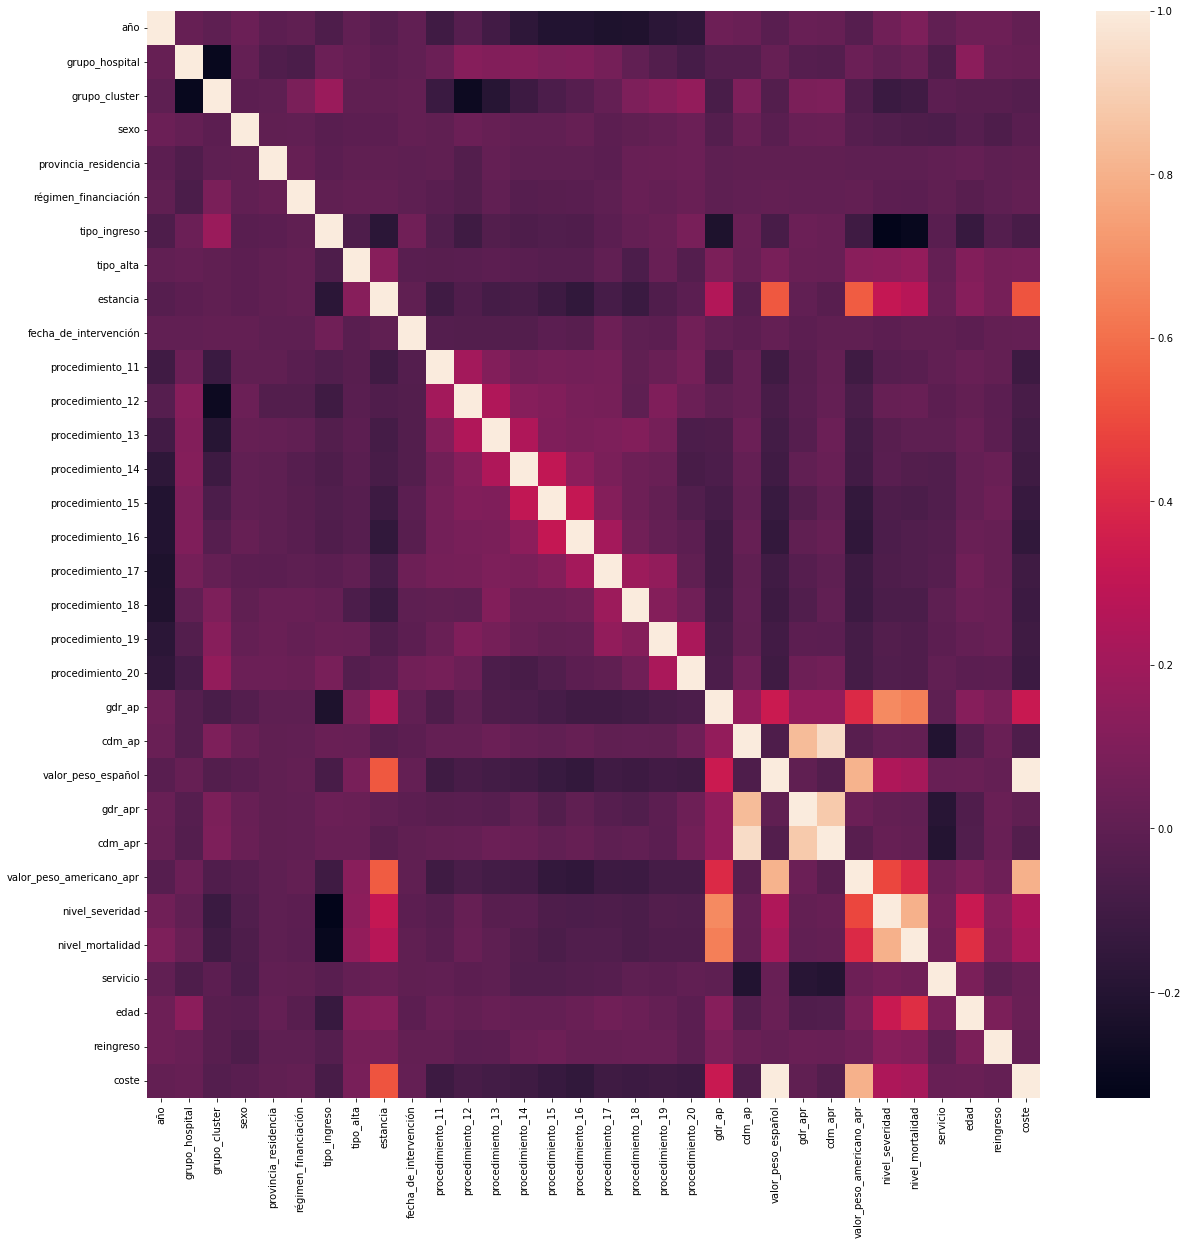

In [256]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [257]:
df.select_dtypes('number').describe()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
count,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,4.998000e+03,12341.000000,7648.000000,4976.000000,7378.000000,6064.000000,4901.000000,3990.000000,3357.000000,2780.000000,2123.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000
mean,2011.504729,3.069386,8.712382,1.385640,28.295345,1.108190,1.229322,1.148045,8.233792,1.601155e+07,89.994133,88.978576,89.173368,90.813866,90.658287,90.871745,90.641140,90.146235,90.557446,91.138337,339.322477,4.462391,0.927574,165.432335,4.482379,1.020586,2.408303,2.166997,0.990265,66.232373,0.129136,4326.082895
std,2.248531,0.963666,20.757274,0.486806,5.048316,0.773977,0.505773,0.709761,10.094767,8.673040e+06,11.674164,13.366136,12.870377,9.212901,9.544991,9.400413,9.454177,9.762235,8.079143,7.419758,240.095403,2.991342,1.166974,128.710834,2.995818,0.947053,0.891282,0.967887,0.098184,17.506537,0.335351,5533.796695
min,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012013e+06,0.120000,0.140000,0.120000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,3.000000,9.022010e+06,89.390000,88.927500,89.370000,89.170000,89.370000,89.520000,89.520000,89.370000,89.370000,89.520000,88.000000,4.000000,0.634600,136.000000,4.000000,0.607200,2.000000,1.000000,1.000000,57.000000,0.000000,3020.730000
50%,2012.000000,3.000000,4.000000,1.000000,28.000000,1.000000,1.000000,1.000000,6.000000,1.608201e+07,90.490000,90.420000,90.460000,90.410000,90.310000,90.490000,90.420000,90.410000,90.410000,90.590000,539.000000,4.000000,0.830500,140.000000,4.000000,0.905700,3.000000,2.000000,1.000000,70.000000,0.000000,4040.280000
75%,2013.000000,4.000000,5.000000,2.000000,28.000000,1.000000,1.000000,1.000000,10.000000,2.311201e+07,93.960000,93.940000,93.940000,93.960000,93.960000,93.960000,93.940000,92.180000,92.140000,93.940000,541.000000,4.000000,0.949800,141.000000,4.000000,1.047400,3.000000,3.000000,1.000000,79.000000,0.000000,4584.570000
max,2015.000000,4.000000,99.000000,3.000000,99.000000,9.000000,9.000000,9.000000,623.000000,3.112201e+07,99.840000,99.990000,99.910000,99.990000,99.840000,99.940000,99.840000,99.840000,99.840000,99.840000,901.000000,25.000000,23.036400,956.000000,25.000000,17.419400,4.000000,4.000000,1.000000,110.000000,1.000000,116051.540000


In [258]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [259]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [260]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [261]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [262]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [263]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

In [264]:
conditionlist = [
    (df['edad'] <= 12) ,
    (df['edad'] > 12) & (df['edad'] <=18),
    (df['edad'] >18) & (df['edad'] <=26),
    (df['edad'] >=27) & (df['edad'] <=59),
    (df['edad']>=60)]
choicelist = ['Niño','Adolescente', 'Joven', 'Adulto','Persona Mayor']
df['grupo_edad'] = np.select(conditionlist, choicelist, default='Not Specified')

<AxesSubplot:title={'center':'estancia'}, xlabel='[grupo_edad]'>

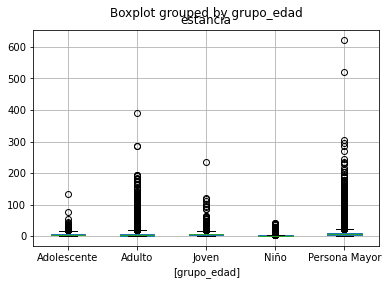

In [265]:
df[['grupo_edad','estancia']].boxplot(by='grupo_edad')

In [266]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [267]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [268]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [269]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [270]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

In [271]:
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [272]:
px.line(df.groupby('ingreso_mes_año').count().reset_index().sort_values('ingreso_mes_año'),x='ingreso_mes_año',y='fecha_de_ingreso')

In [273]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','historia_recodificada','cip_recodificado','diagnóstico_principal','diagnóstico_2','procedimiento_1','valor_peso_español','nivel_severidad','nivel_mortalidad',	'servicio','edad','reingreso']

In [274]:
len(features)

16

<AxesSubplot:title={'center':'edad'}, xlabel='[grupo_cluster]'>

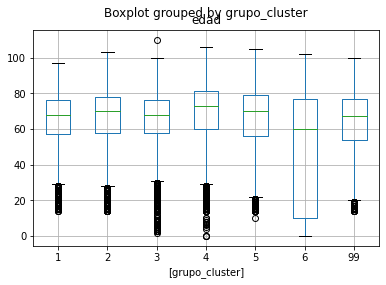

In [275]:
df[['grupo_cluster','edad']].boxplot(by='grupo_cluster')

In [276]:
df.ingreso_mes_año.value_counts()

2015-01-01    2226
2011-01-01    2134
2012-01-01    2130
2014-01-01    1887
2013-12-01    1879
              ... 
2007-12-01     549
2007-11-01      19
2007-10-01       3
2007-09-01       3
2007-08-01       2
Name: ingreso_mes_año, Length: 101, dtype: int64

In [277]:
df[features].head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso
0,4,1,2013-10-30,1,14,-1687781257578748014,-320943158-171303395,428.0,NaN,39.96,0.9181,3,2,1,69,1
1,4,1,2013-03-19,1,6,166370745435838543,648485069584850511,491.21,NaN,90.42,0.9407,3,3,1,75,0
2,4,1,2013-11-15,1,11,183632305468848809,899288196-1988273609,428.0,NaN,90.42,0.9181,4,4,1,90,0
3,5,2,2013-04-28,1,16,2877111881585847151,-961279109-1723117644,428.1,NaN,88.72,0.9181,3,4,1,56,0
4,3,1,2013-02-07,2,1,17519509571482774643,-33451060035352825,162.5,NaN,33.26,0.9844,2,2,1,84,0


In [278]:
df=df[features]

<AxesSubplot:>

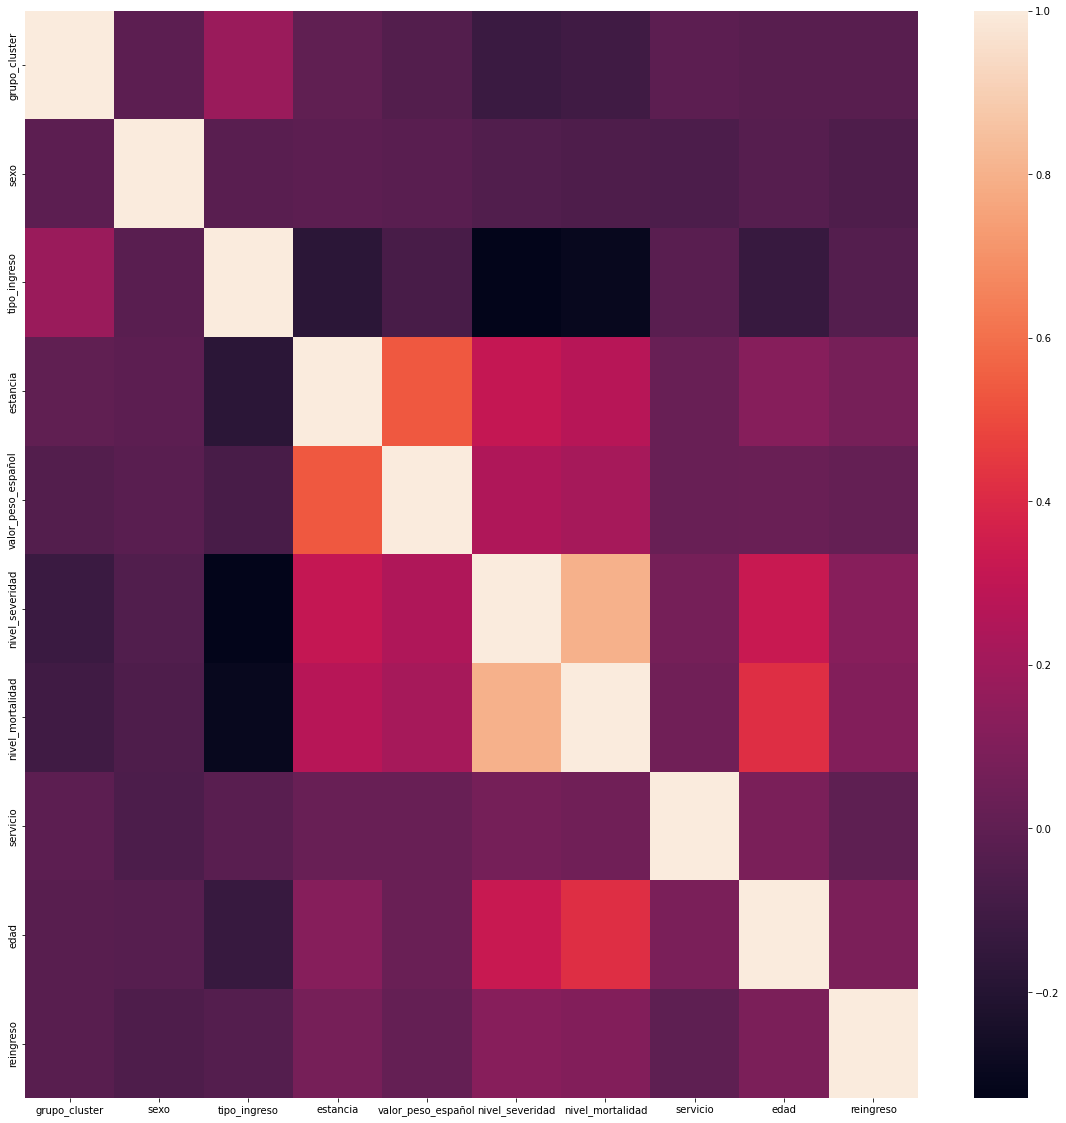

In [279]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [280]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [281]:
df_d = df_calidad_aire[Ds]

In [282]:
df_d.fillna(0,inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_14900/1522000805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
df_calidad_aire['VALUE'] = df_d.mean(axis=1)

In [284]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','VALUE']]

In [285]:
df_calidad_aire['FECHA'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

C:\Users\carlo\AppData\Local\Temp/ipykernel_14900/531591904.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
df_calidad_aire['FECHA'] = pd.to_datetime(df_calidad_aire['FECHA'])

C:\Users\carlo\AppData\Local\Temp/ipykernel_14900/2985784993.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','FECHA']).mean().reset_index()

In [288]:
px.line(df_magnitud,x='FECHA',y='VALUE',color='MAGNITUD')

In [289]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas menor 2.5 μm', 10:'Partículas menor 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [290]:
def set_values(row, value):
    return value[row]

In [291]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [292]:
px.line(df_magnitud.reset_index(),x='FECHA',y='VALUE',color='MAGNITUD_NOMBRE')

In [293]:
df_umbrales = pd.read_excel('data/Umbrales.xlsx')

In [294]:
df_fin = df_magnitud.merge(df_umbrales, left_on='MAGNITUD',right_on='CODIGO', how='inner')

In [295]:
particulas=['Dióxido de Azufre','Monóxido de Carbono','Dióxido de Nitrógeno','Partículas menor 2,5 μm','Partículas menor 10 μm','Óxidos de Nitrógeno','Ozono','Benceno']

In [296]:
df_fin.drop(['CODIGO','MAGNITUD_y'],axis=1,inplace=True)

In [297]:
df_fin.columns = ['CODIGO','FECHA','ANO','MES', 'VALUE', 'PARTICULA', 'ABREVIATURA','MEDIDA','LIMITE', 'COMENTARIO']

In [298]:
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'VALUE'] = np.nan
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'VALUE'] = df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8)].VALUE.mean()

In [299]:
df_fin.sample(20)

,CODIGO,FECHA,ANO,MES,VALUE,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
68,1,2012-09-01,2012.0,9.0,2.200000,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
640,10,2015-09-01,2015.0,9.0,15.803763,Partículas menor 10 μm,PM10,μg/m 3,40,Límite en la media anual
666,12,2008-07-01,2008.0,7.0,59.852151,Óxidos de Nitrógeno,NOx,μg/m 3,30,Afecta a la vegetación
649,12,2007-02-01,2007.0,2.0,103.785924,Óxidos de Nitrógeno,NOx,μg/m 3,30,Afecta a la vegetación
899,30,2009-12-01,2009.0,12.0,1.141290,Benceno,BEN,μg/m 3,5,Media anual
241,8,2009-02-01,2009.0,2.0,51.110215,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
455,10,2007-12-01,2007.0,12.0,31.908602,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
264,8,2011-01-01,2011.0,1.0,55.534946,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
888,30,2009-01-01,2009.0,1.0,0.709677,Benceno,BEN,μg/m 3,5,Media anual
869,30,2007-06-01,2007.0,6.0,0.275806,Benceno,BEN,μg/m 3,5,Media anual


In [300]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

In [301]:
df_temperatura=df_temperatura[['fecha','tm_mes']]

In [302]:
df_temperatura.fecha=pd.to_datetime(df_temperatura.fecha)

In [303]:
df_temperatura.tm_mes.interpolate(method="akima",inplace=True)

In [304]:
px.line(df_temperatura,x='fecha',y='tm_mes')

## Diagnósticos

In [305]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

enfermedad_renal = [
    '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [306]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [307]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    ~((df['diagnóstico_2'].isin(enfermedad_renal)) & (df['procedimiento_1'].isin(dialisis)) )
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [308]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [309]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'enfermedad renal': enfermedad_renal,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

,diagnóstico_principal,diagnosis_name
0,428.0,insuficiencia cardiaca congestiva
1,491.21,enfermedad pulmonar obstructiva cronica
2,428.0,insuficiencia cardiaca congestiva
3,428.1,insuficiencia cardiaca congestiva
4,162.5,NaN


In [310]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [312]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [313]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [314]:
df=df.sort_values('fecha_de_ingreso')
df.head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,año_ingreso,mes_ingreso,dia_ingreso,admission_date,diagnosis_name,disease_name
16583,6,1,2007-08-02,2,166,-529045945-1318899342,00,011.93,292.9,87.44,2.015,2,1,1,37,0,2007,8,2,2007-08-02,NaN,NaN
12521,5,2,2007-08-20,2,193,-1710416977-1689576786,00,150.5,038.9,31.1,16.498,4,4,1,73,0,2007,8,20,2007-08-20,NaN,NaN
28366,4,1,2007-09-20,1,112,679077701190970178,00,394.0,041.19,31.1,16.498,4,4,1,76,0,2007,9,20,2007-09-20,NaN,NaN
47906,5,1,2007-09-20,1,127,15168214271531108233,00,860.0,038.9,00.17,16.498,4,4,1,79,0,2007,9,20,2007-09-20,NaN,NaN
60137,3,2,2007-09-29,1,109,1698874227-411547317,00,518.81,246.8,31.1,11.517,3,4,1,73,0,2007,9,29,2007-09-29,NaN,NaN


In [315]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})
df_num_ingresos.head()

,año_ingreso,mes_ingreso,numero_de_ingresos
0,2007,8,2
1,2007,9,3
2,2007,10,3
3,2007,11,19
4,2007,12,549


In [316]:
df_num_ingresos.dtypes

año_ingreso           int64
mes_ingreso           int64
numero_de_ingresos    int64
dtype: object

In [317]:
df_num_ingresos['mes_ano']=df_num_ingresos.año_ingreso.astype('str')+'-'+df_num_ingresos.mes_ingreso.astype('str')

In [318]:
df_num_ingresos.mes_ano=pd.to_datetime(df_num_ingresos.mes_ano,format='%Y-%m')

In [319]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [320]:
df_merge=df_num_ingresos.merge(df_fin,left_on=['año_ingreso','mes_ingreso'],right_on=['ANO','MES'],how='inner')

In [321]:
df_merge.head()

,año_ingreso,mes_ingreso,numero_de_ingresos,mes_ano,CODIGO,FECHA,ANO,MES,VALUE,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
0,2007,8,2,2007-08-01,1,2007-08-01,2007.0,8.0,6.366935,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
1,2007,8,2,2007-08-01,6,2007-08-01,2007.0,8.0,0.234677,Monóxido de Carbono,CO,μg/m 3,10,Máxima diaria de las medias móviles octohorarias
2,2007,8,2,2007-08-01,8,2007-08-01,2007.0,8.0,30.892473,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
3,2007,8,2,2007-08-01,9,2007-08-01,2007.0,8.0,14.887097,Partículas menor 2.5 μm,PM2.5,μg/m 3,25,Media anual
4,2007,8,2,2007-08-01,10,2007-08-01,2007.0,8.0,34.865591,Partículas menor 10 μm,PM10,μg/m 3,40,Límite en la media anual


In [322]:
px.line(df_merge,x='FECHA',y=['numero_de_ingresos','VALUE'])

In [323]:
px.line(df_merge,x='FECHA',y=['VALUE','LIMITE'],color='PARTICULA')

In [324]:
df_merge=df_merge[['FECHA','numero_de_ingresos','CODIGO','VALUE','PARTICULA','LIMITE']]

In [325]:
df_merge.head(10)

,FECHA,numero_de_ingresos,CODIGO,VALUE,PARTICULA,LIMITE
0,2007-08-01,2,1,6.366935,Dióxido de Azufre,500
1,2007-08-01,2,6,0.234677,Monóxido de Carbono,10
2,2007-08-01,2,8,30.892473,Dióxido de Nitrógeno,400
3,2007-08-01,2,9,14.887097,Partículas menor 2.5 μm,25
4,2007-08-01,2,10,34.865591,Partículas menor 10 μm,40
5,2007-08-01,2,10,34.865591,Partículas menor 10 μm,50
6,2007-08-01,2,12,46.169355,Óxidos de Nitrógeno,30
7,2007-08-01,2,14,59.720430,Ozono,120
8,2007-08-01,2,30,0.375806,Benceno,5
9,2007-09-01,3,1,5.955645,Dióxido de Azufre,500


In [326]:
df_def=pd.pivot_table(df_merge,index='FECHA',columns='PARTICULA',values='VALUE').merge(df_merge.groupby('FECHA')['numero_de_ingresos'].mean().reset_index(),on='FECHA',how='inner').merge(df_temperatura,left_on='FECHA',right_on='fecha',how='inner')

In [327]:
df_def.head()

,FECHA,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Monóxido de Carbono,Ozono,Partículas menor 10 μm,Partículas menor 2.5 μm,Óxidos de Nitrógeno,numero_de_ingresos,fecha,tm_mes
0,2007-08-01,0.375806,6.366935,30.892473,0.234677,59.720430,34.865591,14.887097,46.169355,2.0,2007-08-01,24.790547
1,2007-09-01,0.475806,5.955645,42.860215,0.295565,44.430108,32.129032,14.854839,69.545699,3.0,2007-09-01,21.800000
2,2007-10-01,0.640323,7.802419,53.387097,0.389113,27.263441,26.752688,15.306452,102.561828,3.0,2007-10-01,15.200000
3,2007-11-01,1.193548,16.778226,68.491935,0.593145,15.510753,34.978495,17.645161,179.212366,19.0,2007-11-01,8.800000
4,2007-12-01,1.085484,20.241935,65.532258,0.654435,13.053763,31.908602,19.467742,189.701613,549.0,2007-12-01,4.305392


In [328]:
df_def.numero_de_ingresos=df_def.numero_de_ingresos.shift(-1)

In [329]:
df_def.head()

,FECHA,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Monóxido de Carbono,Ozono,Partículas menor 10 μm,Partículas menor 2.5 μm,Óxidos de Nitrógeno,numero_de_ingresos,fecha,tm_mes
0,2007-08-01,0.375806,6.366935,30.892473,0.234677,59.720430,34.865591,14.887097,46.169355,3.0,2007-08-01,24.790547
1,2007-09-01,0.475806,5.955645,42.860215,0.295565,44.430108,32.129032,14.854839,69.545699,3.0,2007-09-01,21.800000
2,2007-10-01,0.640323,7.802419,53.387097,0.389113,27.263441,26.752688,15.306452,102.561828,19.0,2007-10-01,15.200000
3,2007-11-01,1.193548,16.778226,68.491935,0.593145,15.510753,34.978495,17.645161,179.212366,549.0,2007-11-01,8.800000
4,2007-12-01,1.085484,20.241935,65.532258,0.654435,13.053763,31.908602,19.467742,189.701613,1620.0,2007-12-01,4.305392


In [330]:
df_def['Benceno_1_mes']=df_def.Benceno.shift()
df_def['Benceno_2_meses']=df_def.Benceno.shift(2)
df_def['Benceno_3_meses']=df_def.Benceno.shift(3)
df_def['DióxidodDeAzufre_1_mes']=df_def['Dióxido de Azufre'].shift()
df_def['DióxidodDeAzufre_2_meses']=df_def['Dióxido de Azufre'].shift(2)
df_def['DióxidodDeAzufre_3_meses']=df_def['Dióxido de Azufre'].shift(3)
df_def['Ozono_1_mes']=df_def.Ozono.shift()
df_def['Ozono_2_meses']=df_def.Ozono.shift(2)
df_def['Ozono_3_meses']=df_def.Ozono.shift(3)
df_def['DióxidodDeNitrogeno_1_mes']=df_def['Dióxido de Nitrógeno'].shift()
df_def['DióxidodDeNitrogeno_2_meses']=df_def['Dióxido de Nitrógeno'].shift(2)
df_def['DióxidodDeNitrogeno_3_meses']=df_def['Dióxido de Nitrógeno'].shift(3)
df_def['MonoxidoDeCarbono_1_mes']=df_def['Monóxido de Carbono'].shift()
df_def['MonoxidoDeCarbono_2_meses']=df_def['Monóxido de Carbono'].shift(2)
df_def['MonoxidoDeCarbono_3_meses']=df_def['Monóxido de Carbono'].shift(3)
df_def['OxidosDeNitrogeno_1_mes']=df_def['Óxidos de Nitrógeno'].shift()
df_def['OxidosDeNitrogeno_2_meses']=df_def['Óxidos de Nitrógeno'].shift(2)
df_def['OxidosDeNitrogeno_3_meses']=df_def['Óxidos de Nitrógeno'].shift(3)
df_def['Particulas10_1_mes']=df_def['Partículas menor 10 μm'].shift()
df_def['Particulas10_2_meses']=df_def['Partículas menor 10 μm'].shift(2)
df_def['Particulas10_3_meses']=df_def['Partículas menor 10 μm'].shift(3)
df_def['Particulas2.5_1_mes']=df_def['Partículas menor 2.5 μm'].shift()
df_def['Particulas2.5_2_meses']=df_def['Partículas menor 2.5 μm'].shift(2)
df_def['Particulas2.5_3_meses']=df_def['Partículas menor 2.5 μm'].shift(3)

In [345]:
df_def.drop('fecha',inplace=True,axis=1)

In [346]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','tm_mes']
columns_y='numero_de_ingresos'


X_train,X_test,y_train,y_test=train_test_split(df_def[ (~df_def[columns_y].isna())][columns_X],df_def[ (~df_def[columns_y].isna())][columns_y],test_size=0.2,random_state=42)

## XGBoost

In [347]:
model1=XGBRegressor(random_state=42, n_estimators=200, max_depth=8, min_sample_split = 20, learning_rate = 0.01, colsample_bytree = 0.6)

In [348]:
model1.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[21:17:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'XGBRegressor Feature Importance')

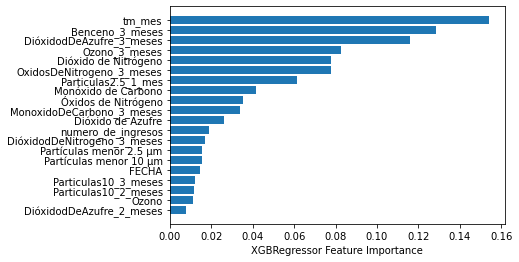

In [349]:
sorted_idx = model1.feature_importances_.argsort()
plt.barh(df_def.columns[sorted_idx][-20:], model1.feature_importances_[sorted_idx][-20:])
plt.xlabel("XGBRegressor Feature Importance")

In [350]:
preds1=model1.predict(X_test)

In [351]:
np.sqrt(mean_squared_error(preds1,y_test))

307.038751424234

In [352]:
mean_absolute_error(preds1,y_test)

259.2282549619675

In [353]:
mean_absolute_percentage_error(preds1,y_test)

0.2416807130597965

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



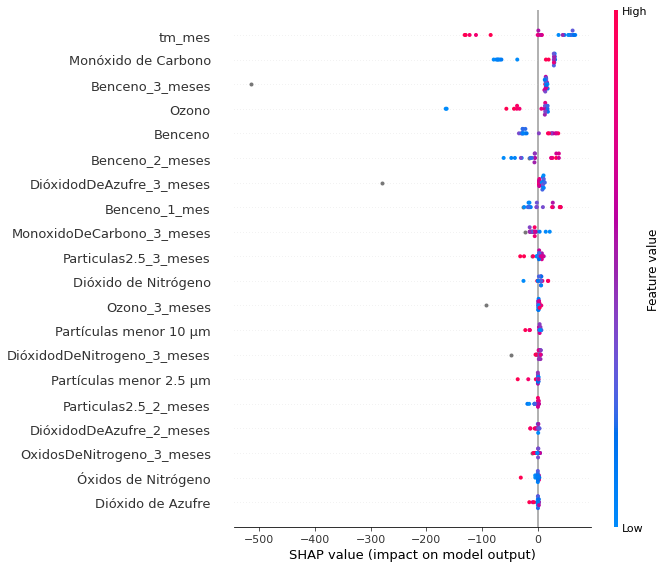

In [354]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [341]:
model2=RandomForestRegressor(max_depth=10)

In [342]:
model2.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
pred2=model2.predict(X_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
mean_absolute_error(pred2,y_test)

234.92904043575476

In [ ]:
mean_absolute_percentage_error(pred2,y_test)

0.20288449828097363

In [ ]:
np.sqrt(mean_squared_error(pred2,y_test))

281.0233460937032

In [ ]:
model3=GradientBoostingRegressor()

In [ ]:
model3.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
pred3=model3.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
mean_absolute_error(pred3,y_test)

237.00270873764916

In [ ]:
mean_absolute_percentage_error(pred3,y_test)

0.19519022421707394

In [ ]:
np.sqrt(mean_squared_error(pred3,y_test))

281.89236114697184

## CatBoost

In [355]:
model4=CatBoostRegressor(iterations=100,
                          learning_rate=0.01,
                          depth=10)

In [356]:
model4.fit(X_train,y_train)

0:	learn: 375.0424986	total: 110ms	remaining: 10.9s
1:	learn: 373.7482454	total: 202ms	remaining: 9.88s
2:	learn: 372.4988446	total: 365ms	remaining: 11.8s
3:	learn: 371.3559256	total: 460ms	remaining: 11.1s
4:	learn: 370.2408351	total: 509ms	remaining: 9.68s
5:	learn: 369.0926204	total: 569ms	remaining: 8.91s
6:	learn: 367.7776096	total: 630ms	remaining: 8.37s
7:	learn: 366.6872154	total: 678ms	remaining: 7.8s
8:	learn: 365.4180417	total: 688ms	remaining: 6.95s
9:	learn: 364.0117501	total: 734ms	remaining: 6.6s
10:	learn: 362.9445118	total: 905ms	remaining: 7.32s
11:	learn: 361.5333145	total: 1.16s	remaining: 8.48s
12:	learn: 360.4618688	total: 1.25s	remaining: 8.38s
13:	learn: 359.2039290	total: 1.3s	remaining: 7.97s
14:	learn: 357.6860932	total: 1.34s	remaining: 7.62s
15:	learn: 356.4542435	total: 1.41s	remaining: 7.38s
16:	learn: 355.5255401	total: 1.42s	remaining: 6.95s
17:	learn: 354.4734952	total: 1.43s	remaining: 6.52s
18:	learn: 353.3212233	total: 1.48s	remaining: 6.32s
19:	le

Text(0.5, 0, 'XGBRegressor Feature Importance')

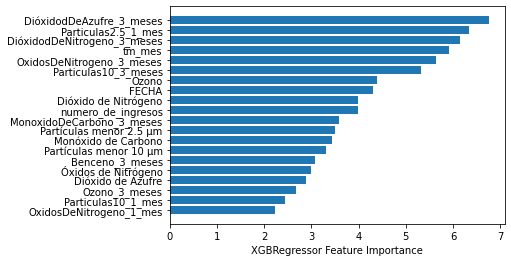

In [357]:
sorted_idx = model4.feature_importances_.argsort()
plt.barh(df_def.columns[sorted_idx][-20:], model4.feature_importances_[sorted_idx][-20:])
plt.xlabel("XGBRegressor Feature Importance")

In [358]:
pred4=model4.predict(X_test)

In [359]:
mean_absolute_error(pred4,y_test)

241.47861935752243

In [360]:
mean_absolute_percentage_error(pred4,y_test)

0.17453168796142793

In [361]:
np.sqrt(mean_squared_error(pred4,y_test))

362.07821053345157

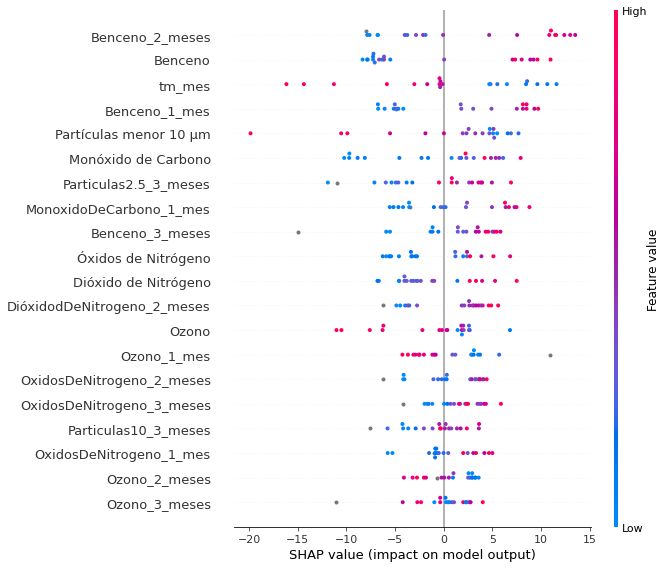

In [362]:
explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## LightGBM

In [363]:
model5=LGBMRegressor()

In [364]:
model5.fit(X_train,y_train)

LGBMRegressor()

Text(0.5, 0, 'XGBRegressor Feature Importance')

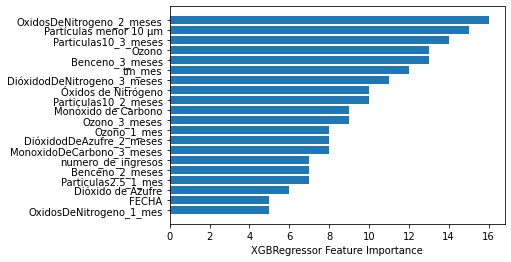

In [365]:
sorted_idx = model5.feature_importances_.argsort()
plt.barh(df_def.columns[sorted_idx][-20:], model5.feature_importances_[sorted_idx][-20:])
plt.xlabel("XGBRegressor Feature Importance")

In [366]:
pred5=model5.predict(X_test)

In [367]:
mean_absolute_error(pred5,y_test)

152.81925194371274

In [368]:
mean_absolute_percentage_error(pred5,y_test)

0.1405922985398504

In [369]:
np.sqrt(mean_squared_error(pred5,y_test))

205.66359715028395

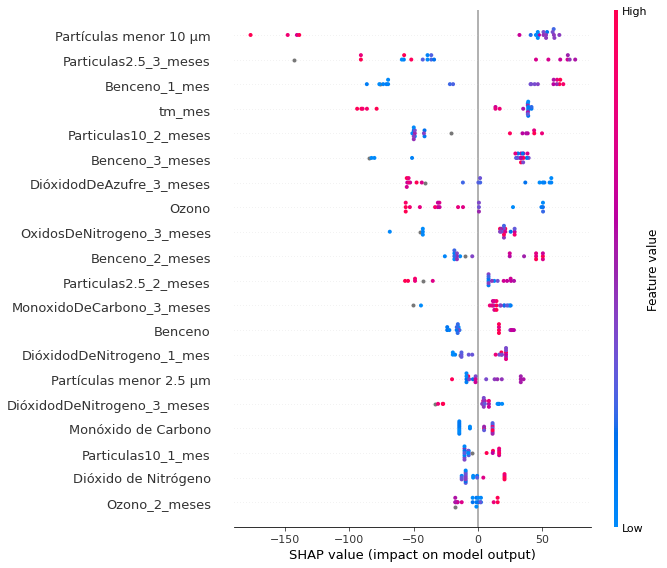

In [370]:
explainer = shap.TreeExplainer(model5)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)